## 필요한 모듈 임포트

In [48]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## MNIST 데이터 셋 불러오기

In [49]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [50]:
X_train = X_train / 255

## train 데이터의 상위 10개 추출

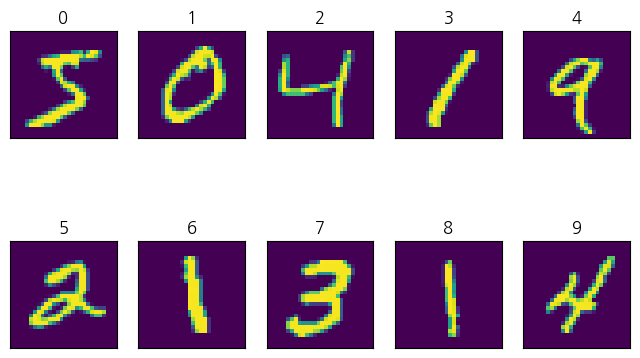

In [65]:
plt.figure(figsize=(8, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)
    plt.imshow(X_train[i])

## 모델 생성

In [53]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

## 모델의 입력, 출력 계층 설정

In [55]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

## 모델 컴파일 및 훈련

In [56]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1442 - accuracy: 0.9555 - val_loss: 5.8474 - val_accuracy: 0.9849
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0454 - accuracy: 0.9857 - val_loss: 4.9916 - val_accuracy: 0.9885
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 4.0252 - val_accuracy: 0.9912
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 5.7699 - val_accuracy: 0.9902
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 10.6038 - val_accuracy: 0.9821


## 마우스 이벤트 처리(그리기)

In [57]:
drawing = False

def onMouse(event, x, y, flags, param):
    global img, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        if drawing:
            cv2.circle(param, (x, y), 15, (255, 255, 255), -1)
            cv2.imshow('paint', img)
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(param, (x, y), 15, (255, 255, 255), -1)
            cv2.imshow('paint', img)
    elif event == cv2.EVENT_LBUTTONUP:
        if drawing:
            drawing = False


## 숫자 예측 후 출력

In [58]:
def predicting(img):
    img = np.expand_dims(img, axis=2)  # 채널 차원 추가
    img = np.expand_dims(img, axis=0)  # 배치 차원 추가
    pred = model.predict(img)
    print(pred[0].argmax())

## 맞출 숫자의 이미지 선택

In [59]:
img = np.full((512, 512, 1), 0, np.uint8)

def mouseBrush():
    global img
    cv2.namedWindow('paint')
    cv2.setMouseCallback('paint', onMouse, param=img)

    while True:
        cv2.imshow('paint', img)
        keycode = cv2.waitKey()
        if keycode == 27:
            break
        elif keycode == 99:     # c
            resized = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_LINEAR)
            predicting(resized)
            cv2.circle(img, (255, 255), 500, (0, 0, 0), -1)     # 지우개 역할

    cv2.destroyAllWindows()

## 동작 확인

In [67]:
mouseBrush()

1/1 [==============================] - 0s 20ms/step
2
